Initial Exploration
Shape: (38, 13)
Columns: ['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Equipe_type']
First rows:
         Date   Time        Round  Day  Venue Result  GF  GA        Opponent  \
0  17.08.2024  21:30  Matchweek 1  Sat      1      W   2   1        Valencia   
1  24.08.2024  19:00  Matchweek 2  Sat      0      W   2   1   Athletic Club   
2  27.08.2024  21:30  Matchweek 3  Tue      1      W   2   1  Rayo Vallecano   
3  31.08.2024  17:00  Matchweek 4  Sat      0      W   7   0      Valladolid   
4  15.09.2024  16:15  Matchweek 5  Sun      1      W   4   1          Girona   

    xG  xGA  Poss  Equipe_type  
0  3,2    1    63            0  
1  1,8    1    64            1  
2  1,4  0,4    64            1  
3  4,7  0,5    70            1  
4  1,9  1,3    55            1  
Results Distribution
W    28
L     6
D     4
Name: Result, dtype: int64
Win rate: 73.7%
Descriptive Analysis
            Poss         GF         GA     

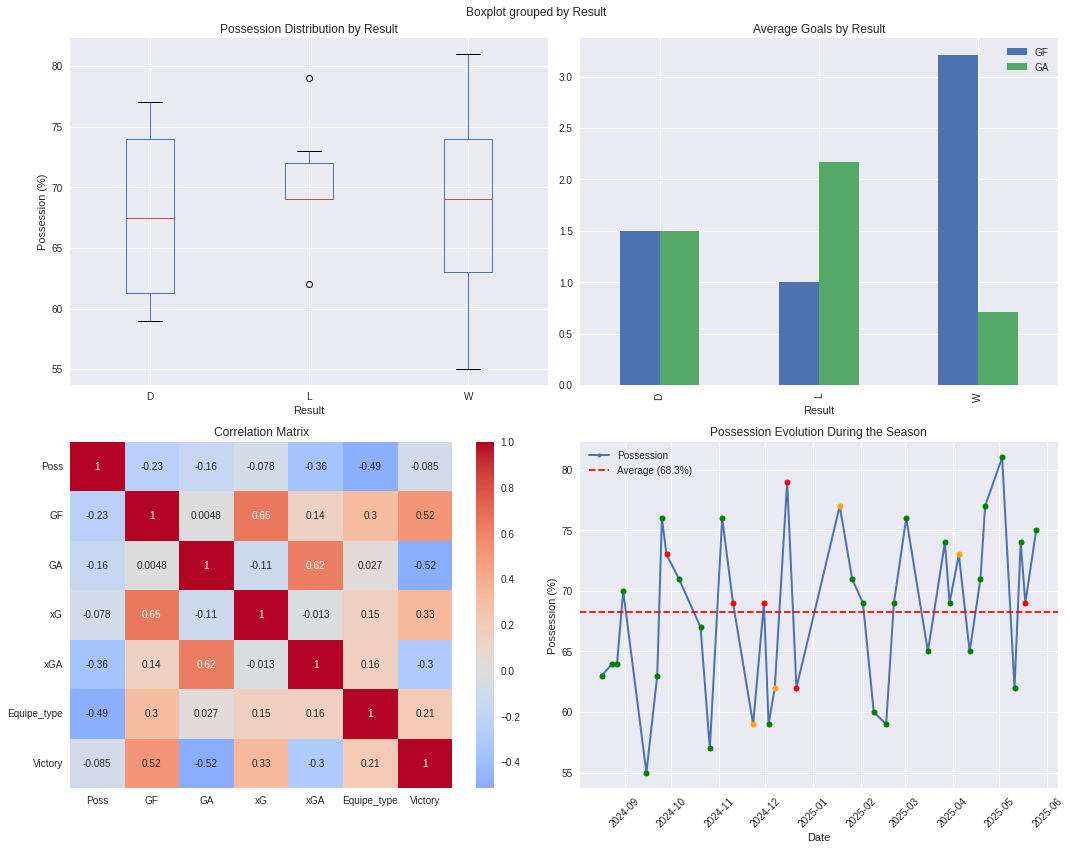

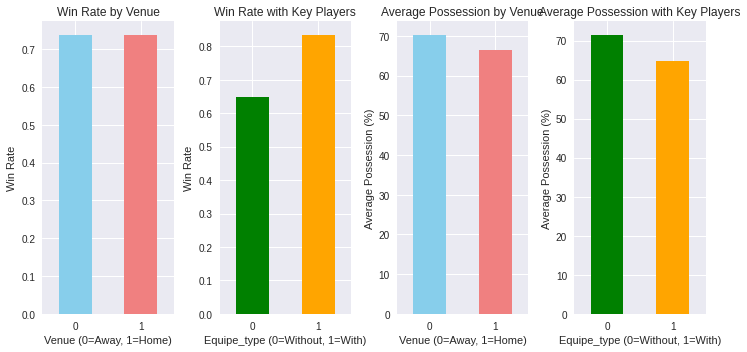

Home/Away performeneces
       Victory     GF     GA    Poss
Venue                               
0        0.737  2.737  1.053  70.158
1        0.737  2.632  1.000  66.368
With/Without Key players
             Victory     GF     GA    Poss
Equipe_type                               
0              0.650  2.200  1.000  71.350
1              0.833  3.222  1.056  64.833


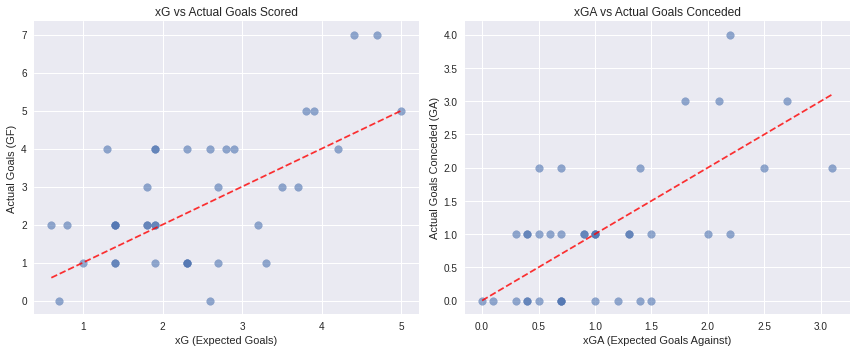

Offensive/ Defensive Efficiency
Average offensive efficiency: 0.28
Average defensive efficiency: 0.08
Key Findings Summary
OVERALL WIN RATE: 73.7%
HOME WINS: 73.7%
AWAY WINS: 73.7%
WINS with Key Players: 83.3%
WINS without Key Players: 65.0%
AVERAGE POSSESSION: 68.3%
BEST VICTORY INDICATOR: GF (corr: 0.516)
OFFENSIVE EFFICIENCY: 0.28 goals above xG
DEFENSIVE EFFICIENCY: 0.08 goals below xGA
Conclusion:
 1) Barcelona is more efficient in attack than expected by xG
 2) They concede less goals than expected by xGA 
 3) They is no difference on the win rate beetween an away or home game
 4) Finally, there is a difference of 18.3% of win rate
MODEL 1 - Win vs Non-Win
Accuracy: 0.500
              precision    recall  f1-score   support

     Non-Win       0.00      0.00      0.00         2
         Win       0.67      0.67      0.67         6

    accuracy                           0.50         8
   macro avg       0.33      0.33      0.33         8
weighted avg       0.50      0.50      0.

(RandomForestClassifier(max_depth=4, random_state=42),
 {'accuracy': 1.0,
  'predictions': array(['W', 'W', 'W', 'W', 'W', 'W', 'L', 'W'], dtype=object),
  'actual': array(['W', 'W', 'W', 'W', 'W', 'W', 'L', 'W'], dtype=object),
  'class_distribution': {'train': {'W': 21, 'L': 5, 'D': 4},
   'test': {'W': 7, 'L': 1}}})

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



def load_and_clean_data():

    # 1. Uploading the Data

    df = pd.read_csv('/files/ps3-Athithsko/Projet Ml/ProjetBarca.csv', sep=';', encoding='latin1')

    # 2. Clean the Dataset

    print("Initial Exploration")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("First rows:")
    print(df.head())

    # Date cleaning
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    
    # Convert commas to dots for numeric values
    numeric_columns = ['xG', 'xGA', 'Poss']
    for col in numeric_columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # Create target variable
    df['Victory'] = (df['Result'] == 'W').astype(int)
    df['Defeat'] = (df['Result'] == 'L').astype(int)
    df['Draw'] = (df['Result'] == 'D').astype(int)

    print(f"Results Distribution")
    print(df['Result'].value_counts())
    print(f"Win rate: {(df['Victory'].mean()*100):.1f}%")
    
    return df

def explanatory_analysis(df):

    # 3. Explanory Analysis
    print(f"Descriptive Analysis")
    print(df[['Poss', 'GF', 'GA', 'xG', 'xGA','Equipe_type']].describe())

    # Correlations
    print(f"Correlation with victory")
    correlation_with_win = df[['Poss', 'GF', 'GA', 'xG', 'xGA', 'Equipe_type','Victory' ]].corr()['Victory'].sort_values(ascending=False)
    print(correlation_with_win)
    
    return correlation_with_win


def create_visualizations(df, correlation_with_win):

    # 4. Visualization
    plt.style.use('seaborn')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Chart 1: Possession vs Results
    df.boxplot(column='Poss', by='Result', ax=axes[0,0])
    axes[0,0].set_title('Possession Distribution by Result')
    axes[0,0].set_ylabel('Possession (%)')

    # Chart 2: Goals scored/conceded by result
    result_means = df.groupby('Result')[['GF', 'GA']].mean()
    result_means.plot(kind='bar', ax=axes[0,1], title='Average Goals by Result')

    # Chart 3: Correlation matrix
    corr_matrix = df[['Poss', 'GF', 'GA', 'xG', 'xGA', 'Equipe_type', 'Victory']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
    axes[1,0].set_title('Correlation Matrix')

    # Chart 4: Possession evolution over time
    axes[1,1].plot(df['Date'], df['Poss'], marker='o', linewidth=2, markersize=4, label='Possession')
    axes[1,1].axhline(y=df['Poss'].mean(), color='r', linestyle='--', label=f'Average ({df["Poss"].mean():.1f}%)')

    # Add results with colors
    for i, row in df.iterrows():
        color = 'green' if row['Result'] == 'W' else 'red' if row['Result'] == 'L' else 'orange'
        axes[1,1].plot(row['Date'], row['Poss'], 'o', color=color, markersize=6)

    axes[1,1].set_title('Possession Evolution During the Season')
    axes[1,1].set_ylabel('Possession (%)')
    axes[1,1].set_xlabel('Date')
    axes[1,1].legend()
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 5. Additional visualization - Home/Away performance and Equipe_type
    plt.figure(figsize=(10, 5))

    # Win rate by venue
    venue_stats = df.groupby('Venue').agg({
        'Victory': 'mean',
        'GF': 'mean',
        'GA': 'mean',
        'Poss': 'mean'
    }).round(3)

    # Win rate with/without Key Players
    Key_Players_stats = df.groupby('Equipe_type').agg({
        'Victory': 'mean',
        'GF': 'mean',
        'GA': 'mean',
        'Poss': 'mean'
    }).round(3)

    # Bar chart for wins(Home/Away games)
    plt.subplot(1, 4, 1)
    venue_stats['Victory'].plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Win Rate by Venue')
    plt.xlabel('Venue (0=Away, 1=Home)')
    plt.ylabel('Win Rate')
    plt.xticks(rotation=0)

    # Bar chart for wins (Key Players)
    plt.subplot(1, 4, 2)
    Key_Players_stats['Victory'].plot(kind='bar', color=['green', 'orange'])
    plt.title('Win Rate with Key Players')
    plt.xlabel('Equipe_type (0=Without, 1=With)')
    plt.ylabel('Win Rate')
    plt.xticks(rotation=0)

    # Chart for average possession (Home/Away games)
    plt.subplot(1, 4, 3)
    venue_stats['Poss'].plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Average Possession by Venue')
    plt.xlabel('Venue (0=Away, 1=Home)')
    plt.ylabel('Average Possession (%)')
    plt.xticks(rotation=0)

    # Chart for average possession (Key Players)
    plt.subplot(1, 4, 4)
    Key_Players_stats['Poss'].plot(kind='bar', color=['green', 'orange'])
    plt.title('Average Possession with Key Players')
    plt.xlabel('Equipe_type (0=Without, 1=With)')
    plt.ylabel('Average Possession (%)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Display venue stats
    print(f"Home/Away performeneces")
    print(venue_stats)

    # Display venue stats
    print(f"With/Without Key players")
    print(Key_Players_stats)


    # 6. XG VS ACTUAL GOALS ANALYSIS
    plt.figure(figsize=(12, 5))

    # Chart xG vs Actual goals
    plt.subplot(1, 2, 1)
    plt.scatter(df['xG'], df['GF'], alpha=0.6, s=60)
    plt.plot([df['xG'].min(), df['xG'].max()], [df['xG'].min(), df['xG'].max()], 'r--', alpha=0.8)
    plt.xlabel('xG (Expected Goals)')
    plt.ylabel('Actual Goals (GF)')
    plt.title('xG vs Actual Goals Scored')

    # Chart xGA vs Goals conceded
    plt.subplot(1, 2, 2)
    plt.scatter(df['xGA'], df['GA'], alpha=0.6, s=60)
    plt.plot([df['xGA'].min(), df['xGA'].max()], [df['xGA'].min(), df['xGA'].max()], 'r--', alpha=0.8)
    plt.xlabel('xGA (Expected Goals Against)')
    plt.ylabel('Actual Goals Conceded (GA)')
    plt.title('xGA vs Actual Goals Conceded')

    plt.tight_layout()
    plt.show()
    
def generate_report(df, correlation_with_win):

    # Calculate offensive/defensive efficiency
    df['Efficiency_Attack'] = df['GF'] - df['xG']  # Positive = more efficient than expected
    df['Efficiency_Defense'] = df['xGA'] - df['GA']  # Positive = better defense than expected

    print(f"Offensive/ Defensive Efficiency")
    print(f"Average offensive efficiency: {df['Efficiency_Attack'].mean():.2f}")
    print(f"Average defensive efficiency: {df['Efficiency_Defense'].mean():.2f}")

    # 7. KEY FINDINGS SUMMARY
    
    print("Key Findings Summary")


    print(f"OVERALL WIN RATE: {(df['Victory'].mean()*100):.1f}%")
    print(f"HOME WINS: {(df[df['Venue']==1]['Victory'].mean()*100):.1f}%")
    print(f"AWAY WINS: {(df[df['Venue']==0]['Victory'].mean()*100):.1f}%")
    print(f"WINS with Key Players: {(df[df['Equipe_type']==1]['Victory'].mean()*100):.1f}%")
    print(f"WINS without Key Players: {(df[df['Equipe_type']==0]['Victory'].mean()*100):.1f}%")
    print(f"AVERAGE POSSESSION: {df['Poss'].mean():.1f}%")
    print(f"BEST VICTORY INDICATOR: {correlation_with_win.index[1]} (corr: {correlation_with_win.iloc[1]:.3f})")
    print(f"OFFENSIVE EFFICIENCY: {df['Efficiency_Attack'].mean():.2f} goals above xG")
    print(f"DEFENSIVE EFFICIENCY: {df['Efficiency_Defense'].mean():.2f} goals below xGA")

    print(f"Conclusion:")
    print(f" 1) Barcelona is more efficient in attack than expected by xG")
    print(f" 2) They concede less goals than expected by xGA ")
    print(f" 3) They is no difference on the win rate beetween an away or home game")
    print(f" 4) Finally, there is a difference of {(df[df['Equipe_type']==1]['Victory'].mean()*100 - df[df['Equipe_type']==0]['Victory'].mean()*100):.1f}% of win rate")
    
    
def train_ml_model(df):
    # First Model: Win vs Non-Win
    df['Is_Win'] = (df['Result'] == 'W').astype(int)
    
    # Second Model: Then, Draw against Lose  
    non_wins = df[df['Result'] != 'W'].copy()
    non_wins['Is_Draw'] = (non_wins['Result'] == 'D').astype(int)
    
    features = ['Poss', 'xG', 'xGA', 'Venue', 'Equipe_type']
    
    # Training for the Win Model
    X_win = df[features]
    y_win = df['Is_Win']
    X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
        X_win, y_win, test_size=0.2, random_state=42, stratify=y_win
    )
    
    model_win = LogisticRegression(random_state=42)
    model_win.fit(X_train_win, y_train_win)
    
    # Win Model Evaluation
    win_predictions = model_win.predict(X_test_win)
    win_accuracy = accuracy_score(y_test_win, win_predictions)
    
    print(f"MODEL 1 - Win vs Non-Win")
    print(f"Accuracy: {win_accuracy:.3f}")
    print(classification_report(y_test_win, win_predictions, target_names=['Non-Win', 'Win']))
    
    # Training for the Draw/Lose Model
    if len(non_wins) > 0:
        X_draw = non_wins[features]
        y_draw = non_wins['Is_Draw']
        X_train_draw, X_test_draw, y_train_draw, y_test_draw = train_test_split(
            X_draw, y_draw, test_size=0.2, random_state=42, stratify=y_draw
        )
        
        model_draw = LogisticRegression(random_state=42)
        model_draw.fit(X_train_draw, y_train_draw)
        
        # Draw Model Evaluation
        draw_predictions = model_draw.predict(X_test_draw)
        draw_accuracy = accuracy_score(y_test_draw, draw_predictions)
        
        print(f"MODEL 2 - Draw vs Lose")
        print(f"Accuracy: {draw_accuracy:.3f}")
        print(classification_report(y_test_draw, draw_predictions, target_names=['Lose', 'Draw']))
    else:
        print("Not enough data for Draw vs Lose model")
        model_draw = None
    
    return model_win, model_draw

def train_robust_ml_model(df, test_size=8):
    """
    Robust ML model that automatically handles class distribution
    """
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report
    
    # Sort by date
    df_sorted = df.sort_values('Date').copy()
    
    # Enhanced feature engineering
    df_sorted['Goal_Diff'] = df_sorted['GF'] - df_sorted['GA']
    df_sorted['xG_Diff'] = df_sorted['xG'] - df_sorted['xGA']
    df_sorted['Total_Goals'] = df_sorted['GF'] + df_sorted['GA']
    
    features = ['Poss', 'xG', 'xGA', 'Venue', 'Equipe_type', 'Goal_Diff', 'xG_Diff', 'Total_Goals']
    
    # Temporal split
    split_index = len(df_sorted) - test_size
    X_train = df_sorted.iloc[:split_index][features]
    y_train = df_sorted.iloc[:split_index]['Result']
    X_test = df_sorted.iloc[split_index:][features]
    y_test = df_sorted.iloc[split_index:]['Result']
    
    print("=" * 60)
    print("ROBUST TEMPORAL VALIDATION")
    print("=" * 60)
    
    # Analyze class distribution
    train_classes = y_train.value_counts()
    test_classes = y_test.value_counts()
    
    print("Class distribution in training set:")
    for result, count in train_classes.items():
        print(f"  {result}: {count} matches")
    
    print("Class distribution in test set:")
    for result, count in test_classes.items():
        print(f"  {result}: {count} matches")
    
    # Choose strategy based on class distribution
    if len(test_classes) < 3:
        print("Warning: Not all result types present in test set")
        # Fall back to Win vs Non-Win if not enough diversity
        if len(test_classes) == 1:
            print("Only one class in test set - using Win probability instead")
            # Use predict_proba for more nuanced results
            use_probability = True
        else:
            use_probability = False
    
    # Model training
    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=4
    )
    
    model.fit(X_train, y_train)
    
    # Prediction
    if len(test_classes) == 1:
        # Use probabilities when only one class
        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        print("\nPREDICTION PROBABILITIES:")
        for i, (true_val, pred_val, proba) in enumerate(zip(y_test, y_pred, y_pred_proba)):
            print(f"Match {i+1}: Actual={true_val}, Predicted={pred_val}, Probabilities={proba}")
    else:
        y_pred = model.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nMODEL PERFORMANCE:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Test matches: {len(y_test)}")
    
    # Dynamic classification report
    if len(test_classes) > 1:
        print("\nCLASSIFICATION REPORT:")
        print(classification_report(y_test, y_pred, zero_division=0))
    
    return model, {
        'accuracy': accuracy,
        'predictions': y_pred,
        'actual': y_test.values,
        'class_distribution': {
            'train': train_classes.to_dict(),
            'test': test_classes.to_dict()
        }
    }


    
    
# Calling the whole function  
df = load_and_clean_data()
correlations = explanatory_analysis(df)
create_visualizations(df, correlations)
generate_report(df, correlations)
train_ml_model(df)
train_robust_ml_model(df, test_size=8)

